# Loan Default Prediction - Part 06 - Feature Selection with Decision Trees

This is an exploratory project for me to apply what I have learned in the Data Science and Machine Learning courses that I took this year. The data is from a Kaggle competition [Loan Default Prediction](https://www.kaggle.com/c/loan-default-prediction). 

This is Part 06 of the project: Feature Selection with Decision Trees.

In this part, I will make use of one useful property of Decision Tree to perform feature selection. The importance of features is implied in the hierarchy of the tree. I select only the more important features as the input to Logistic Regression models and compare with the results in Part 04.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import time
import project_utils as utils

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f3 to loss
dtypes: float64(1789)
memory usage: 1.4 GB
Time elapsed (Training): 39.2515 s
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy (Training): 0.907746
ROCAUC Score (Training): 0.692203
PRAUC Score (Training): 0.121047
Accuracy (Validation): 0.912965
ROCAUC Score (Validation): 0.692612
PRAUC Score (Validation): 0.103512
Time elapsed (Evaluation): 1.0867 s


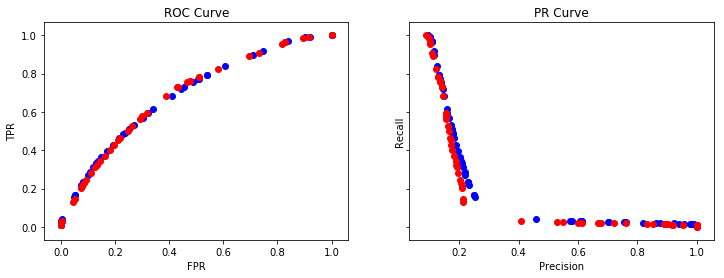

In [2]:
# Load the training data (imputed and normalized) from the CSV file
df, X_orig, y = utils.load_csv('train_v2_preprocessed_normalized.csv')

# Separate training and validation sets
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X_orig, y)

# Train the model and evaluate
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=7)
fit_time = utils.train_model(clf, X_orig, y)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

## Decision Tree Feature Importance

Let's look at the feature importance scores in this model.

In [3]:
feature_importances = sorted(zip(X_orig.columns, clf.feature_importances_), key=lambda x: x[1], reverse=True)

In [4]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
print("Feature importances:")
pp.pprint(feature_importances) 

Feature importances:
[   ('f766', 0.25995671382967045),
    ('f67', 0.0906845095033681),
    ('f670', 0.06201375154241522),
    ('f471', 0.05817551554537074),
    ('f674', 0.04261466876146634),
    ('f230', 0.03982053255179335),
    ('f333', 0.031414236219956315),
    ('f630', 0.019186272710099993),
    ('f251', 0.017880195178356602),
    ('f203', 0.012338795200015197),
    ('f435', 0.011706016366511755),
    ('f271', 0.010474247380458527),
    ('f468', 0.010441070408978206),
    ('f454', 0.010004505874590714),
    ('f464', 0.009980297239659939),
    ('f20', 0.009775354432863996),
    ('f518', 0.009063252644908712),
    ('f768', 0.008284977365534085),
    ('f422', 0.008194376401014346),
    ('f378', 0.008157320134786724),
    ('f55', 0.008083354334126054),
    ('f652', 0.007795417230361772),
    ('f680', 0.007786631131034477),
    ('f260', 0.007574939853544217),
    ('f253', 0.007502358635221445),
    ('f536', 0.00749148377318618),
    ('f216', 0.007421234900734822),
    ('f377', 0.007

## Feature Selection from Feature Importance

Next, I will select the top __k__ features in this list and use them in Logistic Regression models. Note that some of the __k__ values I chose exceed the number of features with nonzero importance scores. In these cases, the rest of the features are selected in the order they appear.

Time elapsed (Training): 44.9637 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906312
ROCAUC Score (Training): 0.736909
PRAUC Score (Training): 0.120929
Accuracy (Validation): 0.911780
ROCAUC Score (Validation): 0.712660
PRAUC Score (Validation): 0.091904
Time elapsed (Evaluation): 0.9547 s


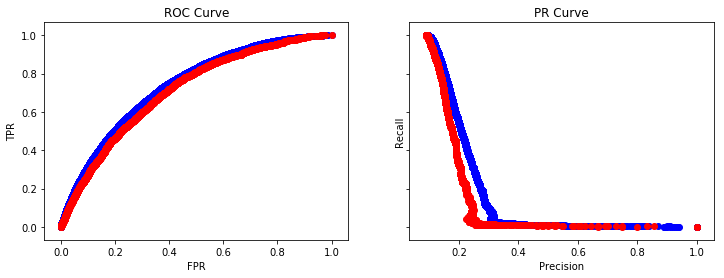

In [5]:
# Train the reference model without feature hashing

from sklearn import linear_model

clf = linear_model.LogisticRegression(C=0.01)
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

In [6]:
# Define the feature selection function

def select_features(k, X_orig, feature_importances):
    cols = [k for k, v in feature_importances[0:k]]
    X = X_orig.loc[:,cols]
    return X

In [7]:
# Define a set of Ks to try

ks = [1000, 500, 200, 100, 50, 20]

----- k = 1000 -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1000 entries, f766 to f295_21
dtypes: float64(1000)
memory usage: 804.7 MB
Time elapsed (Training): 43.2162 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906312
ROCAUC Score (Training): 0.732687
PRAUC Score (Training): 0.117090
Accuracy (Validation): 0.911638
ROCAUC Score (Validation): 0.711649
PRAUC Score (Validation): 0.089245
Time elapsed (Evaluation): 0.7158 s


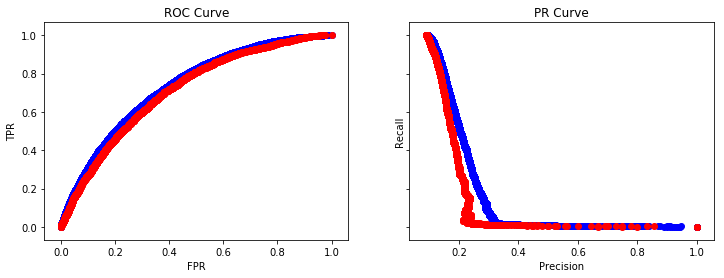

----- k = 500 -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 500 entries, f766 to f531
dtypes: float64(500)
memory usage: 402.3 MB
Time elapsed (Training): 30.4193 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906407
ROCAUC Score (Training): 0.721983
PRAUC Score (Training): 0.107644
Accuracy (Validation): 0.912112
ROCAUC Score (Validation): 0.705971
PRAUC Score (Validation): 0.087274
Time elapsed (Evaluation): 0.5058 s


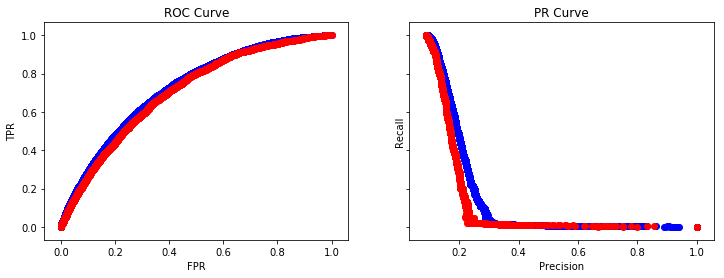

----- k = 200 -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 200 entries, f766 to f153
dtypes: float64(200)
memory usage: 160.9 MB
Time elapsed (Training): 7.9505 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906348
ROCAUC Score (Training): 0.714364
PRAUC Score (Training): 0.101496
Accuracy (Validation): 0.912159
ROCAUC Score (Validation): 0.703577
PRAUC Score (Validation): 0.087533
Time elapsed (Evaluation): 0.4658 s


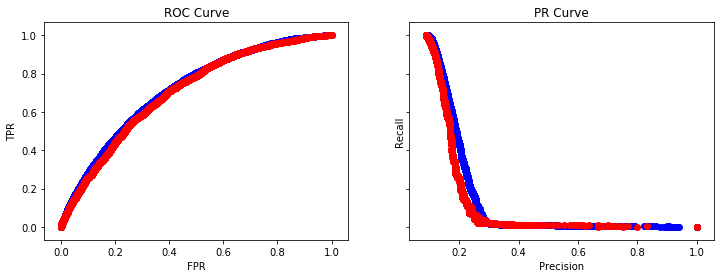

----- k = 100 -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Data columns (total 100 columns):
f766       105471 non-null float64
f67        105471 non-null float64
f670       105471 non-null float64
f471       105471 non-null float64
f674       105471 non-null float64
f230       105471 non-null float64
f333       105471 non-null float64
f630       105471 non-null float64
f251       105471 non-null float64
f203       105471 non-null float64
f435       105471 non-null float64
f271       105471 non-null float64
f468       105471 non-null float64
f454       105471 non-null float64
f464       105471 non-null float64
f20        105471 non-null float64
f518       105471 non-null float64
f768       105471 non-null float64
f422       105471 non-null float64
f378       105471 non-null float64
f55        105471 non-null float64
f652       105471 non-null float64
f680       105471 non-null float64
f260       105471 non-null float64
f253       105471 non-null f

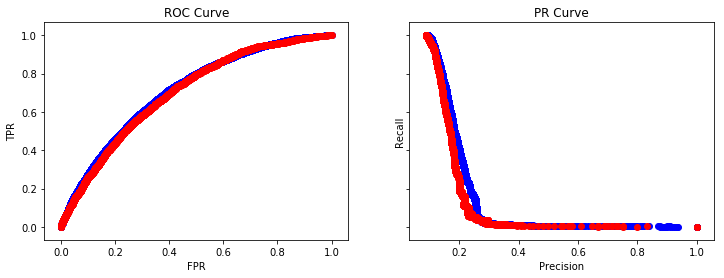

----- k = 50 -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Data columns (total 50 columns):
f766      105471 non-null float64
f67       105471 non-null float64
f670      105471 non-null float64
f471      105471 non-null float64
f674      105471 non-null float64
f230      105471 non-null float64
f333      105471 non-null float64
f630      105471 non-null float64
f251      105471 non-null float64
f203      105471 non-null float64
f435      105471 non-null float64
f271      105471 non-null float64
f468      105471 non-null float64
f454      105471 non-null float64
f464      105471 non-null float64
f20       105471 non-null float64
f518      105471 non-null float64
f768      105471 non-null float64
f422      105471 non-null float64
f378      105471 non-null float64
f55       105471 non-null float64
f652      105471 non-null float64
f680      105471 non-null float64
f260      105471 non-null float64
f253      105471 non-null float64
f536      105471 non

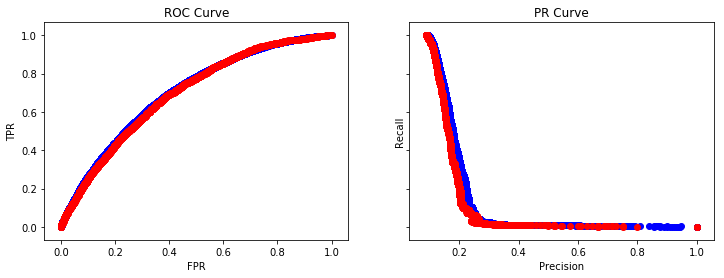

----- k = 20 -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Data columns (total 20 columns):
f766    105471 non-null float64
f67     105471 non-null float64
f670    105471 non-null float64
f471    105471 non-null float64
f674    105471 non-null float64
f230    105471 non-null float64
f333    105471 non-null float64
f630    105471 non-null float64
f251    105471 non-null float64
f203    105471 non-null float64
f435    105471 non-null float64
f271    105471 non-null float64
f468    105471 non-null float64
f454    105471 non-null float64
f464    105471 non-null float64
f20     105471 non-null float64
f518    105471 non-null float64
f768    105471 non-null float64
f422    105471 non-null float64
f378    105471 non-null float64
dtypes: float64(20)
memory usage: 16.1 MB
Time elapsed (Training): 0.4099 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
  

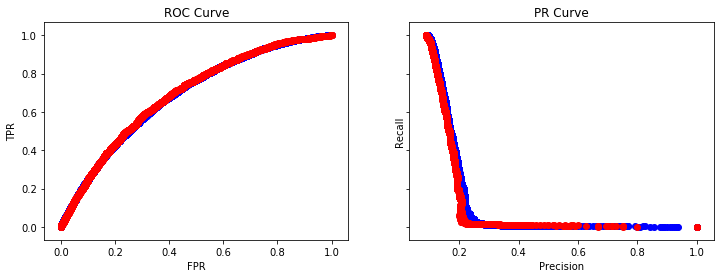

In [8]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %d -----' % k)
    
    X = select_features(k, X_orig, feature_importances)
    X.info()
    X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)
    
    clf = linear_model.LogisticRegression(C=0.01)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

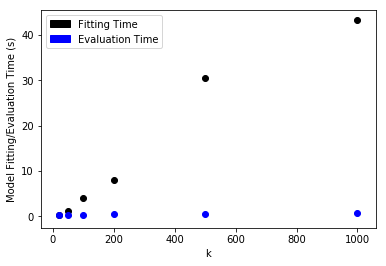

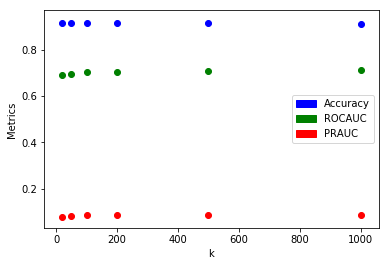

    0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0  1000    0.911638  0.711649  0.089245   43.216219     0.715772
1   500    0.912112  0.705971  0.087274   30.419322     0.505822
2   200    0.912159  0.703577  0.087533    7.950483     0.465834
3   100    0.912064  0.702247  0.085835    3.959726     0.380877
4    50    0.912112  0.694599  0.081688    1.189636     0.344876
5    20    0.912064  0.690783  0.078590    0.409884     0.328895


               0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
count     6.000000    6.000000  6.000000  6.000000    6.000000     6.000000
mean    311.666667    0.912025  0.701471  0.085028   14.524212     0.457013
std     379.495279    0.000193  0.007620  0.004059   17.931722     0.144362
min      20.000000    0.911638  0.690783  0.078590    0.409884     0.328895
25%      62.500000    0.912064  0.696511  0.082725    1.882159     0.353876
50%     150.000000    0.912088  0.702912  0.086554    5.955104     0.423356
75%     425

In [9]:
utils.plot_metrics (ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

The results are pretty similar to those from Feature Hashing, Select-K-Best, and PCA. In this experiment, ROCAUC gradually decreases from 0.712 to 0.691 as k decreases from 1000 to 20. It performs the best compared to the other three feature dimension reduction methods at __k__=20. The others' ROCAUC dropped to around 0.63 to 0.65 at __k__=20. 